In [1]:
from importlib.resources import files
from deep_correlations_trng.utils import read_bits
from deep_correlations_trng.utils import autocorr 

from deep_correlations_trng import data

import numpy as np

In [2]:
data_file = files(data).joinpath('acq_20220608163343_all_dff_out1.bin')
bits = read_bits(data_file)

In [11]:
import deep_correlations_trng.utils as utils

In [50]:
import multiprocess as mp
from scipy.stats import pearsonr


lags = np.arange(10)*100

def job(lag):
    if lag == 0:
        return 1
    else:
        return pearsonr(bits[lag:],bits[:-lag]).statistic

with mp.Pool(2) as p:
    results = p.map(job,lags)

Text(0, 0.5, 'autocorrelation')

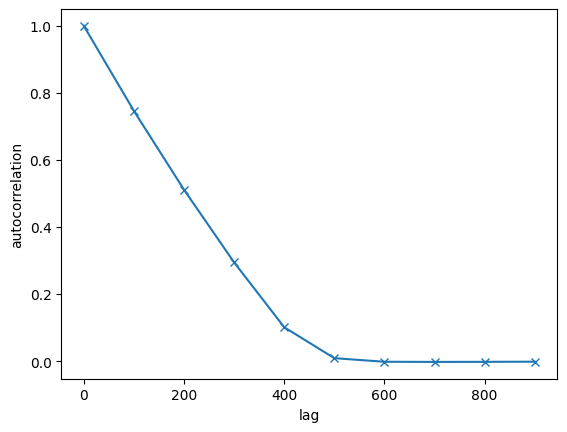

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(lags,results,marker='x')
ax.set_xlabel('lag')
ax.set_ylabel('autocorrelation')